# Validation of link consumption

In [54]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm.notebook import tqdm
import importlib as imp
import random

import main_cd as main
import main_cd_plots as pltm

---

# CONS in a repeater chain

In this test, we generate as many entangled links as possible (limited only by $r$). Then, we apply consumption and we check if the number of links consumed per pair of neighbors ...
 - ... matches the consumption rate, if the rate is an integer.
 - ... matches the consumption rate on average, otherwise.

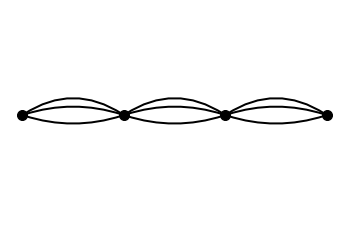

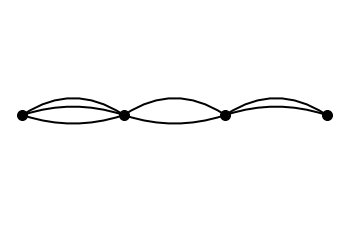

In [55]:
# Inputs
n = 4
p = 1
r = 3
cons_rate = 0.6

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Numerical
randomseed = 2
N_samples = 10000


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

registers = main.create_qubit_registers(A, r)

# Generate as many entangled links as possible
for _ in range(r):
    registers = main.generate_all_links(registers, p)
pltm.plot_entangled_links(registers, layout=layout)
registers = main.consume_fixed_rate(registers, cons_rate)
pltm.plot_entangled_links(registers, layout=layout)

In [56]:
# Inputs
n = 6
p = 1
r = 6
cons_rate = 3.25

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Numerical
randomseed = 2
N_samples = 10000


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

# Theoretical average number of links consumed
# in a repeater chain with no swaps:
total_physical_links = n-1
avg_links_consumed_theory = cons_rate*total_physical_links

links_consumed = []
for _ in range(N_samples):
    registers = main.create_qubit_registers(A, r)
    # Generate as many entangled links as possible
    for _ in range(r):
        registers = main.generate_all_links(registers, p)
    total_links = main.total_qubits_occupied(registers)/2
    registers = main.consume_fixed_rate(registers, cons_rate)
    links_consumed += [total_links - main.total_qubits_occupied(registers)/2]

avg_links_consumed = np.mean(links_consumed)
stderr_links_consumed = np.std(links_consumed)/(N_samples**0.5)
print('Avg number of links consumed (theory): %.3f'%avg_links_consumed_theory)
# Print 95% interval of confidence for the mean
print('Avg number of links consumed (experiment): %.3f (%.3f)'%(avg_links_consumed,
                                                               2*stderr_links_consumed))

Avg number of links consumed (theory): 16.250
Avg number of links consumed (experiment): 16.252 (0.019)


---

# CONS in a squared grid

In this test, we generate as many entangled links as possible (limited only by $r$). Then, we apply consumption and we check if the number of links consumed per pair of neighbors ...
 - ... matches the consumption rate, if the rate is an integer.
 - ... matches the consumption rate on average, otherwise.

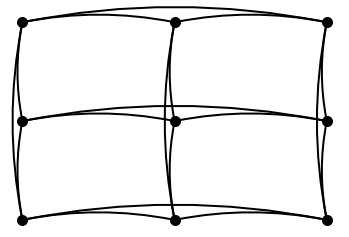

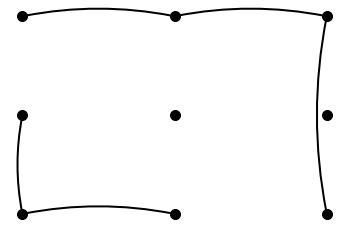

In [57]:
# Inputs
n = 3
p = 1
r = 1
cons_rate = 0.5

# Topology
A = main.adjacency_squared(n)
layout = 'squared'

# Numerical
randomseed = 2
N_samples = 10000


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

registers = main.create_qubit_registers(A, r)

# Generate as many entangled links as possible
for _ in range(r):
    registers = main.generate_all_links(registers, p)
pltm.plot_entangled_links(registers, layout=layout)
registers = main.consume_fixed_rate(registers, cons_rate)
pltm.plot_entangled_links(registers, layout=layout)

In [58]:
# Inputs
n = 3
p = 1
r = 10
cons_rate = 0.78

# Topology
A = main.adjacency_squared(n)
layout = 'squared'

# Numerical
randomseed = 2
N_samples = 10000


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

# Theoretical average number of links consumed
# in a repeater chain with no swaps:
total_physical_links = 2*n*n
avg_links_consumed_theory = cons_rate*total_physical_links

links_consumed = []
for _ in range(N_samples):
    registers = main.create_qubit_registers(A, r)
    # Generate as many entangled links as possible
    for _ in range(r):
        registers = main.generate_all_links(registers, p)
    total_links = main.total_qubits_occupied(registers)/2
    registers = main.consume_fixed_rate(registers, cons_rate)
    links_consumed += [total_links - main.total_qubits_occupied(registers)/2]

avg_links_consumed = np.mean(links_consumed)
stderr_links_consumed = np.std(links_consumed)/(N_samples**0.5)
print('Avg number of links consumed (theory): %.3f'%avg_links_consumed_theory)
# Print 95% interval of confidence for the mean
print('Avg number of links consumed (experiment): %.3f (%.3f)'%(avg_links_consumed,
                                                               2*stderr_links_consumed))

Avg number of links consumed (theory): 14.040
Avg number of links consumed (experiment): 14.041 (0.035)
